Dataset Loaded. Shape: (150, 6)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

K=1
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

K=3
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=5
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=7
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=9
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


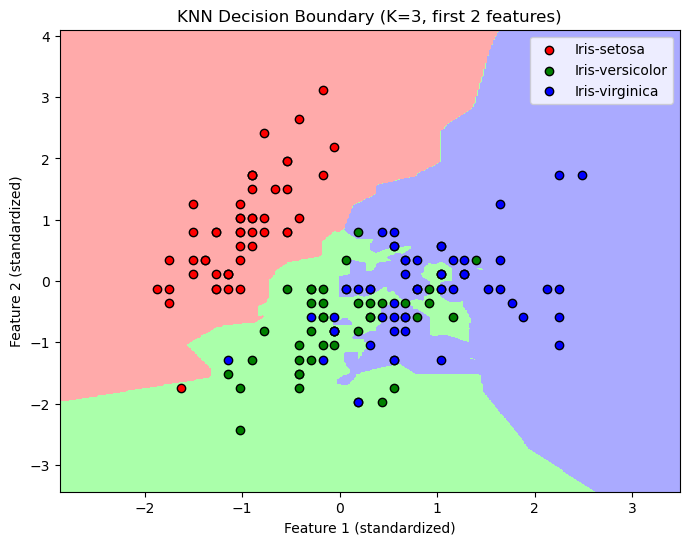

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# --- Load Dataset ---
df = pd.read_csv("Iris.csv")
print("Dataset Loaded. Shape:", df.shape)
print(df.head())

# Drop ID column if present
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

# Encode species
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # 0, 1, 2

# --- Feature & Target ---
X = df.drop("Species", axis=1)
y = df["Species"]

# --- Normalize Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Train & Evaluate KNN for Multiple K ---
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"\nK={k}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- Final Model for Visualization ---
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_train, y_train)

# --- Visualize Decision Boundaries (2D using first 2 features) ---
def plot_decision_boundary(X, y, model, title):
    X = X[:, :2]  # only first 2 features for 2D plot
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y == cl, 0], X[y == cl, 1], 
                    c=cmap_bold[idx], label=le.inverse_transform([cl])[0], edgecolor='k')
    plt.xlabel("Feature 1 (standardized)")
    plt.ylabel("Feature 2 (standardized)")
    plt.title(title)
    plt.legend()
    plt.show()

# Visualize using first 2 features
X_vis = X_scaled[:, :2]
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_vis, y)

plot_decision_boundary(X_vis, y, knn_vis, "KNN Decision Boundary (K=3, first 2 features)")
